In [1]:
using CSV, DataFrames, Plots, Statistics, StatsPlots, Dates
df = CSV.read("accepted_2007_to_2018Q4.csv")
size(df)

(2260701, 151)

In [2]:
for i in names(df)
    println(i)
end

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
fico_range_low
fico_range_high
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
last_fico_range_high
last_fico_range_low
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_act_il
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
to

In [3]:
first(df, 5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate
,String,Missing,Float64⍰,Float64⍰,Float64⍰,String⍰,Float64⍰
1,68407277,missing,3600.0,3600.0,3600.0,36 months,13.99
2,68355089,missing,24700.0,24700.0,24700.0,36 months,11.99
3,68341763,missing,20000.0,20000.0,20000.0,60 months,10.78
4,66310712,missing,35000.0,35000.0,35000.0,60 months,14.85
5,68476807,missing,10400.0,10400.0,10400.0,60 months,22.45


In [14]:
columns = [:loan_amnt, :issue_d, :term, :int_rate, :installment, :grade,
            :sub_grade, :emp_title, :emp_length, :home_ownership,
            :annual_inc, :pymnt_plan, :purpose, :title,
            :zip_code, :addr_state, :dti, :delinq_2yrs,
            :earliest_cr_line, :inq_last_6mths, :mths_since_last_delinq,
            :mths_since_last_record, :open_acc, :pub_rec, :total_acc,
            :total_pymnt, :total_pymnt_inv, :recoveries, :last_pymnt_d,
            :last_pymnt_amnt, :next_pymnt_d, :last_credit_pull_d,
            :annual_inc_joint, :dti_joint, :acc_now_delinq, :tot_coll_amt,
            :tot_cur_bal, :open_acc_6m, :acc_open_past_24mths, :delinq_amnt];

In [15]:
data = df[:, columns];

In [16]:
for col in columns
    println(col, ": ", sum(ismissing.(data[:, col])))
end

loan_amnt: 33
issue_d: 33
term: 33
int_rate: 33
installment: 33
grade: 33
sub_grade: 33
emp_title: 167002
emp_length: 146940
home_ownership: 33
annual_inc: 37
pymnt_plan: 33
purpose: 33
title: 23358
zip_code: 34
addr_state: 33
dti: 1744
delinq_2yrs: 62
earliest_cr_line: 62
inq_last_6mths: 63
mths_since_last_delinq: 1158535
mths_since_last_record: 1901545
open_acc: 62
pub_rec: 62
total_acc: 62
total_pymnt: 33
total_pymnt_inv: 33
recoveries: 33
last_pymnt_d: 2460
last_pymnt_amnt: 33
next_pymnt_d: 1345343
last_credit_pull_d: 105
annual_inc_joint: 2139991
dti_joint: 2139995
acc_now_delinq: 62
tot_coll_amt: 70309
tot_cur_bal: 70309
open_acc_6m: 866163
acc_open_past_24mths: 50063
delinq_amnt: 62


In [17]:
required = [:loan_amnt, :term, :int_rate, :installment, :grade,
            :sub_grade, :home_ownership, :annual_inc, :pymnt_plan,
            :zip_code, :addr_state, :dti, :issue_d, :delinq_2yrs,
            :earliest_cr_line, :inq_last_6mths, :open_acc, :pub_rec,
            :total_acc, :total_pymnt, :total_pymnt_inv, :recoveries,
            :last_pymnt_amnt, :last_credit_pull_d, :acc_now_delinq, :delinq_amnt];

In [18]:
data = dropmissing(data, required);

In [19]:
describe(data)

,variable,mean,min,median,max
,Symbol,Union…,Any,Union…,Any
1,loan_amnt,15044.1,500.0,12900.0,40000.0
2,issue_d,,Apr-2008,,Sep-2018
3,term,,36 months,,60 months
4,int_rate,13.092,5.31,12.62,30.99
5,installment,445.731,4.93,377.89,1719.83
6,grade,,A,,G
7,sub_grade,,A1,,G5
8,emp_title,,\tCFO,,👨\u200d🍳
9,emp_length,,1 year,,< 1 year


In [48]:
data[1:end, :issue_d] = Date.(data[:, :issue_d], Dates.DateFormat("u-y"));

MethodError: MethodError: no method matching Int64(::Date)
Closest candidates are:
  Int64(!Matched::Union{Bool, Int32, Int64, UInt32, UInt64, UInt8, Int128, Int16, Int8, UInt128, UInt16}) at boot.jl:710
  Int64(!Matched::Ptr) at boot.jl:720
  Int64(!Matched::Float32) at float.jl:700
  ...

In [49]:
features = [:loan_amnt, :issue_d, :term, :installment, :grade,
            :sub_grade, :emp_title, :emp_length, :home_ownership,
            :annual_inc, :pymnt_plan, :purpose, :title,
            :zip_code, :addr_state, :dti, :delinq_2yrs,
            :earliest_cr_line, :inq_last_6mths, :mths_since_last_delinq,
            :mths_since_last_record, :open_acc, :pub_rec, :total_acc,
            :total_pymnt, :total_pymnt_inv, :recoveries, :last_pymnt_d,
            :last_pymnt_amnt, :next_pymnt_d, :last_credit_pull_d,
            :annual_inc_joint, :dti_joint, :acc_now_delinq, :tot_coll_amt,
            :tot_cur_bal, :open_acc_6m, :acc_open_past_24mths, :delinq_amnt];

In [50]:
X = data[:, features]
Y = data[:, :int_rate];

In [52]:
viz = by(data, [:issue_d, :grade], :int_rate => x -> sum(x)/size(x, 1))
viz = sort(viz, [:issue_d, :grade]);

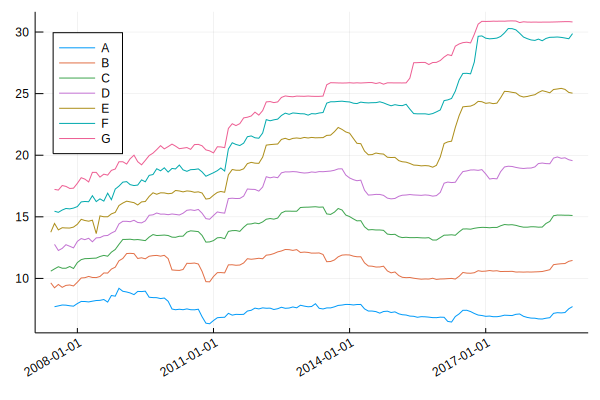

In [95]:
@df viz plot(:issue_d, :int_rate_function, group=:grade, xrotation=30, legend=:topleft)